# Gradient boosting for Work Engagement Latent variable regression

In [10]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing libraries for machine learning
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from joblib import dump,load
import shap


# Importing libraries for hyperparameter optimization
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
# Display setting for exploration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [11]:
# Check out if the environment is the correct Anaconda one
import sys
print('environment: ',sys.executable)

# Set up directory to be the github repository
# requires git
import os
import subprocess
os.getcwd()
output = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'])
path = output.decode('utf-8').strip()
print('working directory: ',path)
os.chdir(path)


environment:  c:\Users\ricca\anaconda3\envs\Thesis\python.exe
working directory:  C:/Users/ricca/Documents/GitHub/Thesis-SEM-ML


In [12]:
from Source.DataPreparation.DataProcessor import DataProcessor
from Source.Regression.latent_variable_regressors import GBoostRegression, RFRegression, LinearRegressionModel
default_rs=42

In [13]:
processorclass=DataProcessor()
#processorclass.read_df()
#processorclass.split_data(random_state=default_rs)
#processorclass.save_data()
#processorclass.process_CFA()

In [14]:
X_train,y_train,X_test,y_test = processorclass.train_test_data_for_WEtarget(target_variable='WorkEngagement',Categories=False)
display(X_test)

,telework,wp_size,private_sector,seniority,part_time,empl_contract,repetitive_movements,asb_verbal,asb_unwanted_sexatt,asb_violence_harassment,discrimination,emot_disturb,night,usual_hours_week,shortnotice,able_hour_off,undesirable_change,losejob,training_employer,training_onthejob,learning_new_things,work_welldone,usefull_work,predict_earnings,ProfessionalSupport,JobOverload,Environmentalrisks,WorkAgency,WHO5
0,6,4,1,26,2,6,<NA>,<NA>,<NA>,<NA>,2,4,2,43,5,4,4,1,2,2,5,4,5,3,-0.280002,0.334880,-0.220972,-0.420407,-0.039092
1,4,6,2,2,2,6,5,2,2,2,2,5,3,35,<NA>,3,1,2,2,2,5,4,5,3,0.040421,-0.245965,0.460461,0.314083,0.132308
2,1,3,1,<NA>,1,5,<NA>,<NA>,<NA>,<NA>,2,3,3,40,4,3,1,2,1,2,5,5,5,2,0.016596,0.163436,0.717667,-0.166545,-0.462013
3,6,6,2,38,2,6,4,2,2,2,2,2,3,40,<NA>,3,2,2,2,1,4,5,5,3,0.073073,0.052183,0.307163,0.067107,0.631984
4,2,4,1,<NA>,2,5,<NA>,<NA>,<NA>,<NA>,1,2,1,45,5,3,2,3,1,2,4,3,3,2,-0.454226,0.204644,-0.264459,-0.732509,-0.202200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,5,2,1,<NA>,2,6,<NA>,<NA>,<NA>,<NA>,2,1,3,48,5,3,1,4,1,1,5,5,5,1,0.487019,-0.109387,0.070106,0.223652,0.568205
354,5,5,1,<NA>,2,6,<NA>,<NA>,<NA>,<NA>,2,2,2,50,5,3,2,4,1,1,5,4,4,1,-0.117673,0.403519,-0.265642,0.228177,-0.108486
355,3,2,1,24,1,6,<NA>,<NA>,<NA>,<NA>,2,1,1,25,5,4,1,1,1,1,4,4,4,2,1.080121,-0.673122,-0.591245,0.202007,1.013791
356,6,1,1,30,2,6,1,2,2,2,2,1,1,60,5,3,<NA>,1,<NA>,<NA>,4,4,<NA>,3,0.116016,-0.312481,-0.110380,0.289763,0.605815


In [15]:
Xgboost=GBoostRegression(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
Xgboost.train(verbosity=0,n_iter=60)
results=Xgboost.get_results(verbose=1)
Xgboost.save_model(model_name='xgbregressor_WE_latent')

Starting the XGBRegressor training
Best Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.5, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.0, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.026362008116868174, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 10, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 321, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Metrics:
MSE: 0.07842719355837484
MAE: 0.21671

In [29]:
X_train_shuffled = X_train.sample(frac=1).reset_index(drop=True)
X_test_shuffled = X_test.sample(frac=1).reset_index(drop=True)

In [30]:
Xgboost=GBoostRegression(x_train=X_train_shuffled,y_train=y_train,x_test=X_test_shuffled,y_test=y_test)
Xgboost.train(verbosity=0,scoringmetric='r2')
results=Xgboost.get_results(verbose=1)
#Xgboost.save_model(model_name='helloworld2')

Starting the XGBRegressor training
Best Parameters:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': 0.5, 'colsample_bynode': None, 'colsample_bytree': 0.5, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.5, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.010818219707620844, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 5, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 223, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 5.0, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Metrics:
MSE: 0.4314880834556884
MAE: 0.5136396

In [ ]:
#plt.figure(figsize=(10, 8))  # make the plot larger
#plt.scatter(Xgboost.y_test, Xgboost.y_pred, alpha=0.5, color='blue')  # alpha makes the dots translucent to visualize density
#plt.plot(np.unique(y_test), np.poly1d(np.polyfit(Xgboost.y_test, Xgboost.y_pred, 1))(np.unique(y_test)), color='red')  # adding a best fit line
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')  # adding a y=x line
#
#plt.grid(True, alpha=0.4)  # adding grid and making it more transparent
#plt.xlabel('Actual Values', fontsize=12)  # increase font size
#plt.ylabel('Predicted Values', fontsize=12)  # increase font size
#plt.suptitle('Random forest regression for Work Engagement factor scores', fontsize=20)
#plt.title('Actual vs. Predicted Values', fontsize=15)  # increase font size
#plt.legend(['Data Points', 'Best Fit Line','Ideal Prediction Line'])  # updating legend
#plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


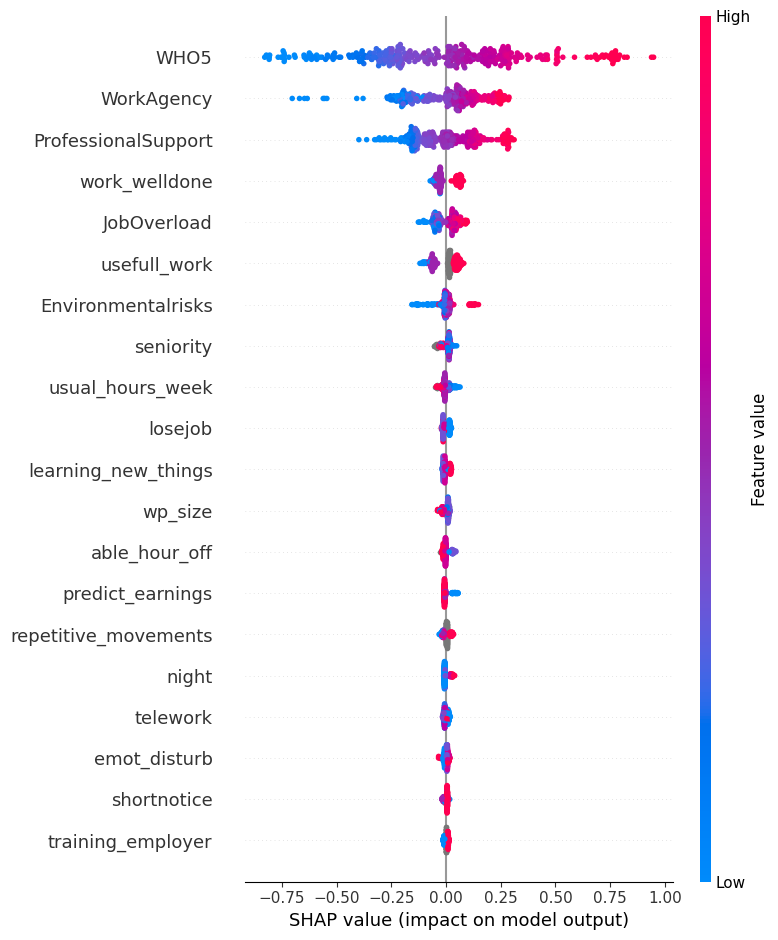

In [ ]:
shapscores=Xgboost.get_shap_values()

# Plot the feature importance
shap.summary_plot(shapscores, Xgboost.x_test.astype('float64'))

In [ ]:
RFRegre=RFRegression(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
RFRegre.train(verbosity=0,n_iter=5)
RFRegre.median_imputation()

Starting the Random Forest training with median imputation


In [ ]:
results=RFRegre.get_results()
RFRegre.save_model(model_name='RFregressor_WE_latent')

Best Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 33, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 163, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Metrics:
MSE: 0.11039361063751156
MAE: 0.2585017489338406
R^2: 0.7142690507212812
Model saved to Models\Regression\helloworld3.pkl
Metadata saved to Models\Regression\helloworld3_metadata.json


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


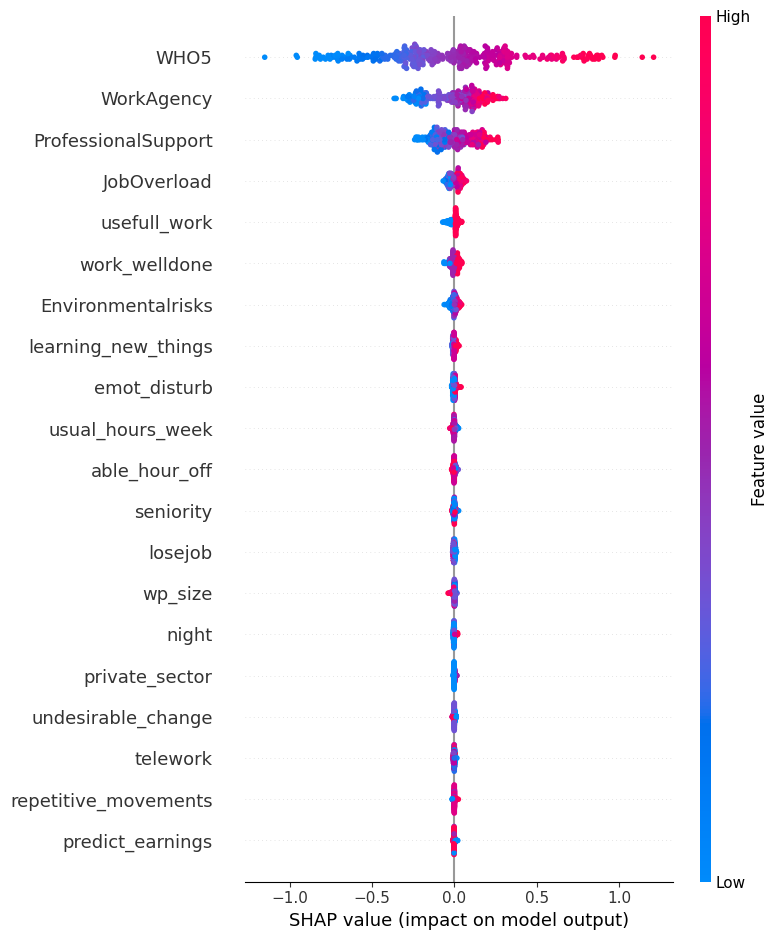

In [ ]:
# Plot the feature importance
shap.summary_plot(RFRegre.get_shap_values(), RFRegre.x_test)

In [ ]:
Lmreg= LinearRegressionModel(x_train=X_train,y_train=y_train,x_test=X_test,y_test=y_test)
Lmreg.median_imputation()
Lmreg.train()
Lmreg.get_results()
Lmreg.save_model(model_name='LinearModel_WE_latent')

Starting the Linear Regression training

Metrics:
MSE: 0.09252851174497416
MAE: 0.23599912837319698
R^2: 0.7605091513579422
Model saved to Models\Regression\helloworld4.pkl
Metadata saved to Models\Regression\helloworld4_metadata.json


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


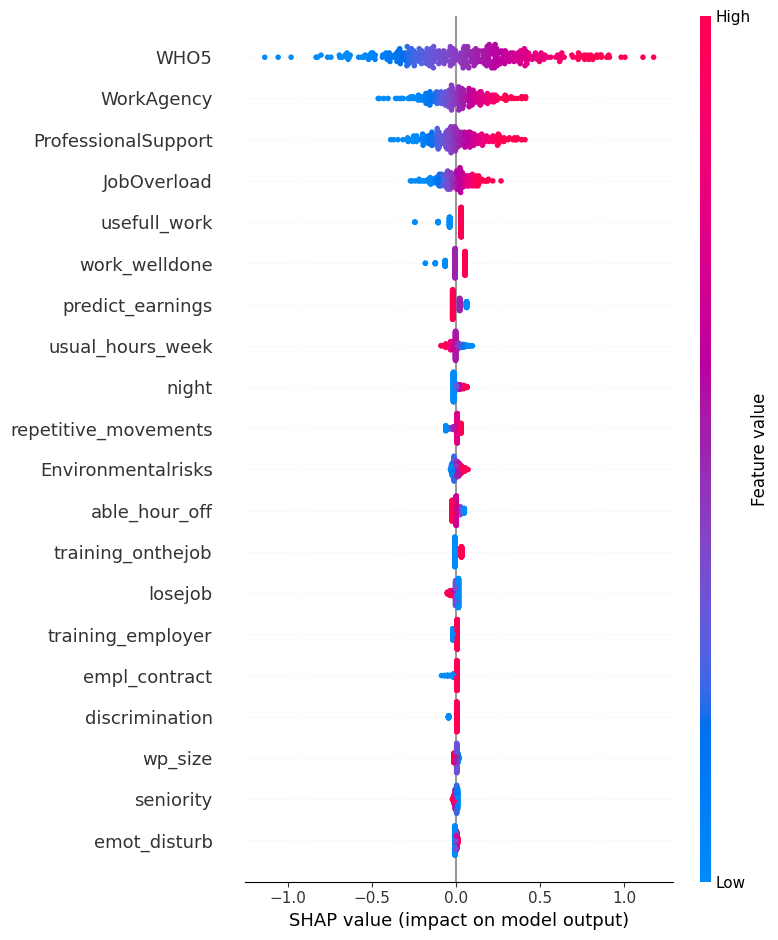

In [ ]:
# Plot the feature importance
shap.summary_plot(Lmreg.get_shap_values(), Lmreg.x_test)